[21.052631578947366, 20.51282051282051, 8.47457627118644, 13.924050632911392, 7.07070707070707, 15.966386554621847, 16.546762589928058, 13.836477987421384, 16.201117318435752, 11.557788944723619, 8.21917808219178, 14.644351464435147, 10.424710424710424, 10.39426523297491, 12.709030100334449, 12.225705329153605, 12.684365781710916, 15.32033426183844, 16.094986807387862, 10.526315789473683, 13.126491646778044, 15.034168564920272, 11.328976034858387, 14.19624217118998, 13.426853707414828, 13.680154142581888, 13.172541743970315, 12.164579606440071, 13.81692573402418, 16.69449081803005, 12.60096930533118]
[31.57894736842105, 33.33333333333333, 23.728813559322035, 32.91139240506329, 32.323232323232325, 30.252100840336134, 30.935251798561154, 30.81761006289308, 32.402234636871505, 30.65326633165829, 31.05022831050228, 30.543933054393307, 34.74903474903475, 33.33333333333333, 32.10702341137124, 37.30407523510972, 30.08849557522124, 29.526462395543174, 31.926121372031663, 32.33082706766917, 30.

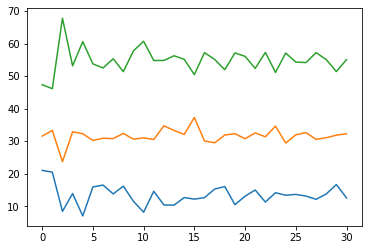

In [18]:
import numpy as np
import random as rm
import sys
import matplotlib.pyplot as plt

# The statespace
states = ["Chabudai","Husuma","TV"]

transitionName = [["CC","CT","CH"],["HH","HT","HC"],["TT","TH","TC"]]
transitionMatrix = [[0.2,0.5,0.3],[0.1,0.6,0.3],[0.5,0.5,0.0]]

alist = []

def generate_sequence(days, cPos):
    # Choose the starting state
    currentPosition = cPos
    alist.append(currentPosition)
    #print("Start state: " + currentPosition)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [currentPosition]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if currentPosition == "Chabudai":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "CC":
                prob = prob * 0.2
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "CT":
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "Husuma":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "HC":
                prob = prob * 0.3
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "HT":
                prob = prob * 0.6
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.1
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "TV":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "TC":
                prob = prob * 0.0
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "TH":
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
            else:
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
        i += 1  


#args = sys.argv
startPosition="TV"

LENGTH = 621
counter = 0

TV_seq = []
Chabudai_seq = []
Husuma_seq = []

for i in range(1,LENGTH,2):
    LEN = i - 1
    alist = []
    
    generate_sequence(LEN, startPosition)

    counter = counter + 1
    
    if counter % 10 == 0:
        sum = alist.count('Chabudai') + alist.count('Husuma') + alist.count('TV') 
        Chabudai_seq.append((alist.count('Chabudai'))/sum*100)
        Husuma_seq.append((alist.count('Husuma'))/sum*100)
        TV_seq.append((alist.count('TV'))/sum*100)
    
    rstring = '' 
    for i in alist:
        rstring = rstring + i[0]
    #print(rstring)
            

print(Chabudai_seq)
print(Husuma_seq)
print(TV_seq)

plt.plot(Chabudai_seq)
plt.plot(Husuma_seq)
plt.plot(TV_seq)
plt.show()
